In [1]:
# !pip install opencv-python
%matplotlib inline
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.draw import circle

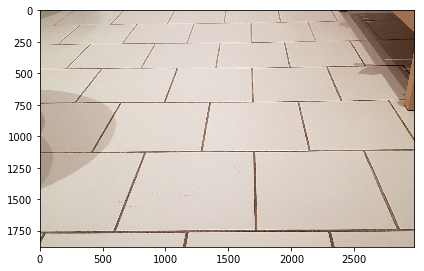

In [2]:
img_ = imread('test_cropped.jpg')
imshow(img_)

In [3]:
obj = [np.array([[-1, 0, 0], [-1, 1, 0], [0, 1, 0], [0, 0, 0], [2, 2, 0], [-3, 4, 0]]).astype('float32')]
img = [np.array([[413, 1123], [639, 728], [1347, 728], [1279, 1120], [2574, 437], [113, 116]]).astype('float32')]

xysize = (2976, 1880)

rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj, img, xysize, None, None)
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
P = np.concatenate([R, t], axis=1)
rms, camera_matrix, R, t, P

(1.1368683772161603e-13,
 array([[3.54442655e+03, 0.00000000e+00, 1.48739609e+03],
        [0.00000000e+00, 4.38502307e+03, 8.98765109e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[ 0.99869876,  0.04417911, -0.02547553],
        [-0.0051729 , -0.40920667, -0.91242706],
        [-0.05073497,  0.91137155, -0.40844566]]),
 array([[-0.24520691],
        [ 0.21134842],
        [ 4.19249696]]),
 array([[ 0.99869876,  0.04417911, -0.02547553, -0.24520691],
        [-0.0051729 , -0.40920667, -0.91242706,  0.21134842],
        [-0.05073497,  0.91137155, -0.40844566,  4.19249696]]))

In [4]:
for i in range(len(obj[0])):
    
    x = np.dot(np.dot(camera_matrix, P), obj[0][i].tolist() + [1])
    x[0] /= x[2]
    x[1] /= x[2]
    x[2] /= x[2]
    print(obj[0][i], img[0][i], x)
    rr, cc = circle(x[0], x[1], 100)
    img_[cc, rr, 0] = 1

[-1.  0.  0.] [ 413. 1123.] [4.48345590e+02 1.12252167e+03 1.00000000e+00]
[-1.  1.  0.] [639. 728.] [662.43590407 734.84760755   1.        ]
[0. 1. 0.] [1347.  728.] [1.34779056e+03 7.28773851e+02 1.00000000e+00]
[0. 0. 0.] [1279. 1120.] [1.28009293e+03 1.11981898e+03 1.00000000e+00]
[2. 2. 0.] [2574.  437.] [2.59053165e+03 4.40958957e+02 1.00000000e+00]
[-3.  4.  0.] [113. 116.] [127.95342411 124.97791005   1.        ]


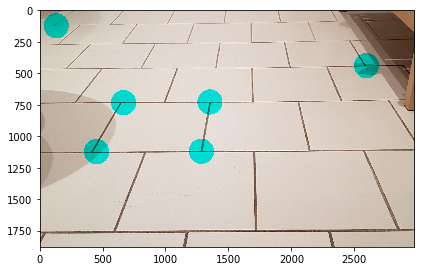

In [5]:
imshow(img_)

In [6]:
x = np.dot(np.dot(camera_matrix, P), [0.5, -1, 0, 1])
x[0] /= x[2]
x[1] /= x[2]
x[2] /= x[2]
x

array([1.71597565e+03, 1.73107722e+03, 1.00000000e+00])